# Correlation analysis

## Import modules

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr, pearsonr, kendalltau
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

## Loading files

In [68]:
# Specify the path to the CSV file
csv_file_path = "C:/Users/AGGVI/STAGE/expression_data_tcga_brca_TCGA-BRCA_log_fpkm_1226_samples_55_genes.csv"

# Specify the genes you want to use for the heatmap
#rows_to_read = ["A1BG", "A2M", "A2MP1"]

## Create the data for input

In [94]:
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path, sep = ';', index_col=1)
df = df.iloc[:, 1:]

# Specify the genes you want to use for the heatmap
rows_to_read = [x for x in df.index]

# Use the loc[] method to filter the DataFrame by row indices
df_filtered = df.loc[rows_to_read].transpose()
df_filtered.head()

gene_symbol,ACAD9,ACTBL2,ACTC1,AHNAK,ARHGEF5,ATP5F1A,BCAR3,BTF3,C1orf116,CEP170,...,SMYD2,TFG,TNKS1BP1,TOP2A,TUBB,TUBB4B,TXNRD1,UBR7,VWA5A,XPO1
TCGA-3C-AAAU-01A,3.443010,0.064055,0.211884,7.186134,2.802131,5.763526,2.381228,5.920429,1.552328,1.750478,...,2.529096,3.242572,6.224316,5.467990,8.021715,6.952972,3.227849,3.901900,2.948694,3.141989
TCGA-3C-AALI-01A,3.378234,0.014212,0.000000,5.957148,1.682798,4.255131,2.921398,5.608330,0.754203,1.622743,...,3.950403,3.474137,5.457637,4.384678,8.128016,8.321633,4.170366,4.560214,1.043415,3.306481
TCGA-3C-AALJ-01A,3.410165,0.000000,0.056722,5.561650,1.795684,5.552254,3.130272,6.871543,0.159500,2.028109,...,3.723286,3.509227,5.597242,5.591802,7.871983,8.279930,3.956977,3.995738,5.964024,3.466875
TCGA-3C-AALK-01A,3.517439,0.020058,0.012211,6.006008,2.092850,5.150889,2.253142,6.559007,3.086631,1.453544,...,3.113850,3.472566,5.670356,3.043029,7.976568,8.003753,3.237411,3.844145,3.075943,2.987648
TCGA-4H-AAAK-01A,3.494249,0.054501,0.013498,6.885628,2.050362,5.469140,3.298673,6.688634,3.711076,1.564720,...,3.467919,3.448438,5.539751,4.167117,7.953283,7.520009,3.213456,4.399800,2.864315,2.750328


## Calculate correlation and draw the heatmap
Leave "desharped" the line corresponding to the one of the three calculation methods that you need.

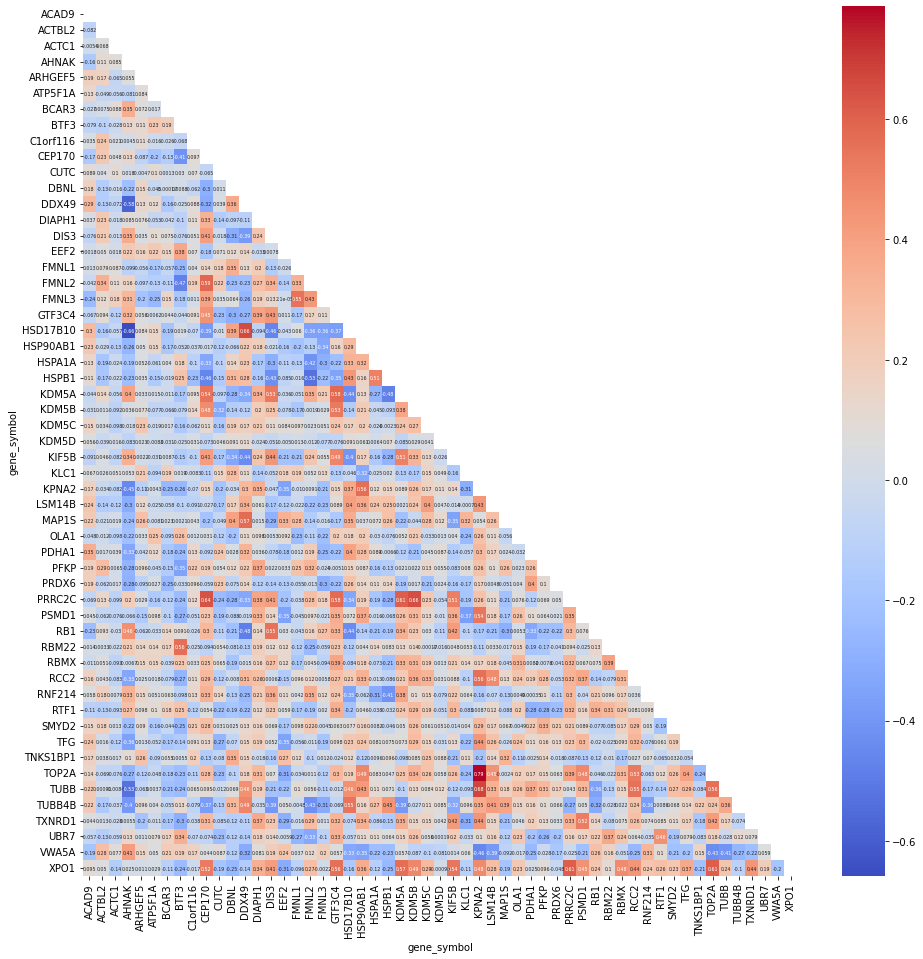

In [134]:
# Calculate the pairwise Spearman correlation between rows

correlation_matrix = df_filtered.corr(method='spearman')
#correlation_matrix = df_filtered.corr(method='pearson')
#correlation_matrix = df_filtered.corr(method='kendall')


# Create a heatmap of the correlation matrix
plt.figure(figsize=(16,16))
heatmap = sns.heatmap(correlation_matrix, cmap="coolwarm", annot = True, 
                      annot_kws={"size": 35 / np.sqrt(len(correlation_matrix))}, mask=np.triu(np.ones_like(correlation_matrix)))        
heatmap.set(xlabel="", ylabel="")
heatmap.set_title('Correlation heatmap', fontsize = 16)


# Save the plot into pdf
heatmap.figure.savefig("heatmap.pdf")

## Print the annotation values if need

In [142]:
print(heatmap.get_children())

 Text(0.5, 1.5, '-0.082'),
 Text(0.5, 2.5, '-0.0054'),
 Text(1.5, 2.5, '0.068'),
 Text(0.5, 3.5, '-0.16'),
 Text(1.5, 3.5, '0.11'),
 Text(2.5, 3.5, '0.085'),
 Text(0.5, 4.5, '0.19'),
 Text(1.5, 4.5, '0.17'),
 Text(2.5, 4.5, '-0.065'),
 Text(3.5, 4.5, '0.055'),
 Text(0.5, 5.5, '0.13'),
 Text(1.5, 5.5, '-0.049'),
 Text(2.5, 5.5, '-0.056'),
 Text(3.5, 5.5, '-0.081'),
 Text(4.5, 5.5, '0.084'),
 Text(0.5, 6.5, '-0.027'),
 Text(1.5, 6.5, '0.0075'),
 Text(2.5, 6.5, '0.088'),
 Text(3.5, 6.5, '0.35'),
 Text(4.5, 6.5, '0.072'),
 Text(5.5, 6.5, '0.017'),
 Text(0.5, 7.5, '-0.079'),
 Text(1.5, 7.5, '-0.1'),
 Text(2.5, 7.5, '-0.028'),
 Text(3.5, 7.5, '0.13'),
 Text(4.5, 7.5, '0.11'),
 Text(5.5, 7.5, '0.23'),
 Text(6.5, 7.5, '0.19'),
 Text(0.5, 8.5, '0.035'),
 Text(1.5, 8.5, '0.24'),
 Text(2.5, 8.5, '0.021'),
 Text(3.5, 8.5, '0.0045'),
 Text(4.5, 8.5, '0.11'),
 Text(5.5, 8.5, '-0.016'),
 Text(6.5, 8.5, '-0.026'),
 Text(7.5, 8.5, '-0.068'),
 Text(0.5, 9.5, '-0.17'),
 Text(1.5, 9.5, '0.23'),
 Text(2.5,

In [132]:
# access the text elements of the plot
random = heatmap.get_children()[3].get_children()

# loop through text elements and print their values
for i, text in enumerate(random):
    if i % (len(correlation_matrix) + 1) != 0:
        print(text.get_text())

## Correlation for 2 genes
Again, choose the calculation method inside the cell by desharping its lines

In [112]:
# Specify 2 genes to make a correlation plot for them
corr_genes = ["FMNL1", "FMNL2"]

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


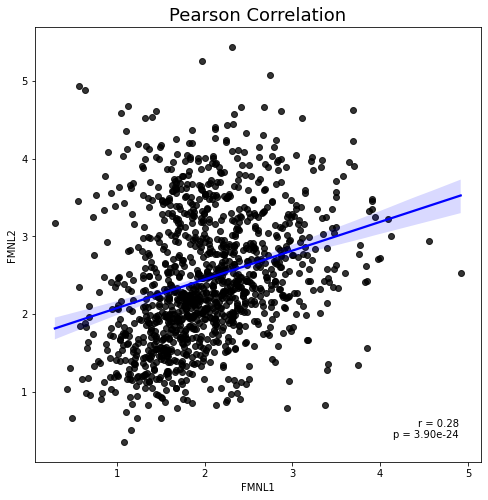

In [121]:
# Create the scatter plot with regression line
fig = plt.figure(figsize=(8,8))
reg = sns.regplot(df_filtered[corr_genes[0]], df_filtered[corr_genes[1]],
           scatter_kws={"color": "black"}, line_kws={"color": "blue"})

# Calculate the correlation coefficient and p-value
corr_coef, p_value = pearsonr(x = df_filtered[corr_genes[0]], y = df_filtered[corr_genes[1]])
method = 'Pearson'

#corr_coef, p_value = spearmanr(x = df_filtered[corr_genes[0]], y = df_filtered[corr_genes[1]])
#method = 'Spearman'

#corr_coef, p_value = kendalltau(x = df_filtered[corr_genes[0]], y = df_filtered[corr_genes[1]])
#method = 'Kendall'

# Add the correlation coefficient and p-value to the plot as text
text = f"r = {corr_coef:.2f}\np = {p_value:.2e}"
reg.set_title(method + " Correlation", fontsize = 18)
plt.text(0.95, 0.05, text, transform=plt.gca().transAxes, va='bottom', ha='right')

# Show the plot
fig.figure.savefig("Correlation.pdf")